In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop

C:\Users\lagg\AppData\Local\Temp\ipykernel_23964\388347847.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Open csv**

In [3]:
df=pd.read_csv("C:/Users/lagg/Desktop/giuliaa/alberta/Study_Hopsking/new_inputs/df_mix.csv")

df=pd.DataFrame(df)

df["DateTime"]=pd.to_datetime(df["DateTime"])
df

,Unnamed: 0,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average,Average_hour_day_ant,Its_higher_than_average_day_ant
0,96,2019-04-02 00:00:00,51.488,0.0,1554163200000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
1,97,2019-04-02 00:15:00,51.794,0.0,1554164100000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
2,98,2019-04-02 00:30:00,51.397,0.0,1554165000000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
3,99,2019-04-02 00:45:00,50.765,0.0,1554165900000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
4,100,2019-04-02 01:00:00,51.206,0.0,1554166800000000000,4,False,True,False,False,2,False,0,False,16.1,1,51.763875,0,51.05075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,0,38.95800,0
26300,26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0
26301,26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0
26302,26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0


*Change of format in "summer_clases"*

In [4]:
def change_format(row):
    valor=row["summer_classes"]
    if valor == 0:
        return False
    elif valor == 1:
        return True
    else:
        # Manejar otros casos si es necesario
        return None  # O cualquier otro valor por defecto

df["summer_classes"]=df.apply(change_format, axis=1)
df



,Unnamed: 0,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average,Average_hour_day_ant,Its_higher_than_average_day_ant
0,96,2019-04-02 00:00:00,51.488,0.0,1554163200000000000,4,False,True,False,False,2,False,False,False,16.1,0,52.269892,0,51.17875,0
1,97,2019-04-02 00:15:00,51.794,0.0,1554164100000000000,4,False,True,False,False,2,False,False,False,16.1,0,52.269892,0,51.17875,0
2,98,2019-04-02 00:30:00,51.397,0.0,1554165000000000000,4,False,True,False,False,2,False,False,False,16.1,0,52.269892,0,51.17875,0
3,99,2019-04-02 00:45:00,50.765,0.0,1554165900000000000,4,False,True,False,False,2,False,False,False,16.1,0,52.269892,0,51.17875,0
4,100,2019-04-02 01:00:00,51.206,0.0,1554166800000000000,4,False,True,False,False,2,False,False,False,16.1,1,51.763875,0,51.05075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,False,False,10.0,22,40.184637,0,38.95800,0
26300,26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,False,False,10.0,23,40.048847,0,38.56300,0
26301,26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,False,False,10.0,23,40.048847,0,38.56300,0
26302,26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,False,False,10.0,23,40.048847,0,38.56300,0


**Eliminate variables with no correlation**

In [5]:
del df["Unnamed: 0"]
del df["season_fall"]
del df["season_spring"]
del df["season_summer"]
del df["season_winter"]
del df["day"]
del df["Hour"]
del df["Its_higher_than_average"]
del df["Its_higher_than_average_day_ant"]
del df["DateTime"]
del df["Timestamp"]
del df["Vacation"]
del df["summer_classes"]
del df["Theres_sun"]
del df["temp_ant"]
del df["Average_hour_month"]
del df["Average_hour_day_ant"]
del df["month"]

df

,RealPower,EV_Power
0,51.488,0.0
1,51.794,0.0
2,51.397,0.0
3,50.765,0.0
4,51.206,0.0
...,...,...
26299,38.313,0.0
26300,38.493,0.0
26301,38.577,0.0
26302,38.619,0.0


**Eliminate outliers**

In [6]:
#df["Timestamp"]=df["Timestamp"].astype("int64")//10**9
#df

In [7]:
df.describe()

,RealPower,EV_Power
count,26304.000000,26304.000000
mean,48.307932,6.167214
std,5.717560,9.099070
min,-1.161000,-6.400000
25%,45.886000,0.000000
50%,48.319000,0.000000
75%,51.776500,9.480000
max,82.339000,55.150000


In [8]:
#df=df[(df["temp_ant"]>0)]
#df=df[(df["RealPower"]>0)]

df.describe()

,RealPower,EV_Power
count,26304.000000,26304.000000
mean,48.307932,6.167214
std,5.717560,9.099070
min,-1.161000,-6.400000
25%,45.886000,0.000000
50%,48.319000,0.000000
75%,51.776500,9.480000
max,82.339000,55.150000


**Split data in training, validation and testing**

In [9]:
# Function to split a time series into training, validation and testing sets

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):

    # Define number of data in each subseries
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Amount of training data
    Nval = int(vl_size*N)    # Amount of validation data
    Ntst = N - Ntrain - Nval # Amount of testing data

    # Split the data
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Use the function to split df
tr, vl, ts = train_val_test_split(df)

#Print the size of each set
print(f'Training set size: {tr.shape}')
print(f'Validation set size: {vl.shape}')
print(f'Testing set size: {ts.shape}')


Training set size: (21043, 2)
Validation set size: (2630, 2)
Testing set size: (2631, 2)


*Graphic subplots of training, validation and testing*

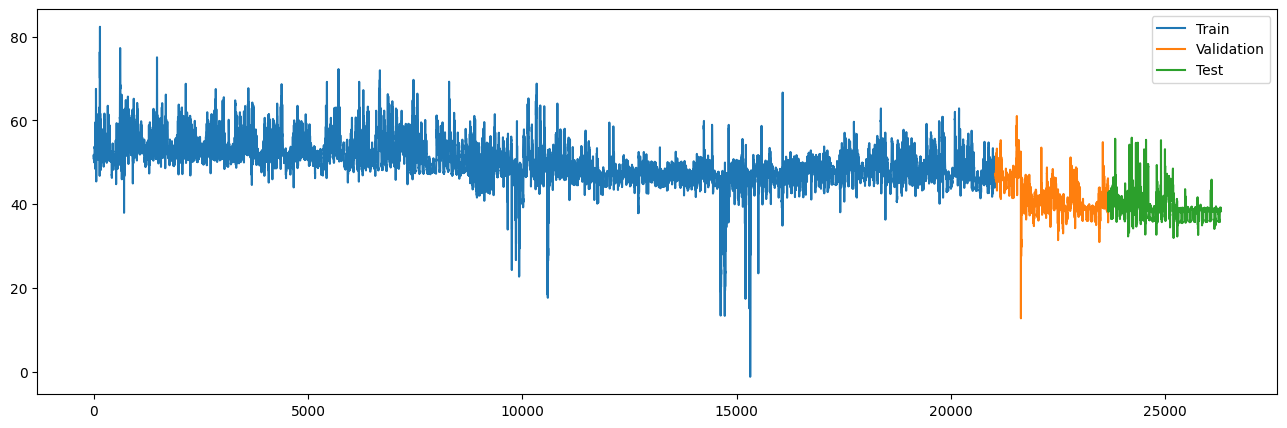

In [10]:
fig, ax =plt.subplots(figsize=(16,5))
ax.plot(tr["RealPower"], label="Train")
ax.plot(vl["RealPower"], label="Validation")
ax.plot(ts["RealPower"], label="Test")
plt.legend()

**Creates a dataset (arrays) with the inputs (x) and outputs (y) for every window**

In [11]:
window = 96 
OUTPUT_LENGTH = 1

def create_dataset(array, window, output_length):

    X, Y = [], []    #list where will store the values for the input (96) and the output (1)
    
    fils, cols = array.shape  #exa: (21043, 2)

    # Generate the input and output data in a list
    for i in range(fils-window-output_length):
        X.append(array[i:i+window,0:cols])
        Y.append(array[i+window:i+window+output_length,0].reshape(output_length,1))
    
    # Convert the list to numpy arrays
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [12]:
#Call the function to create datset for training, validation and testing
x_tr, y_tr = create_dataset(tr.values, window, OUTPUT_LENGTH)
x_vl, y_vl = create_dataset(vl.values, window, OUTPUT_LENGTH)
x_ts, y_ts = create_dataset(ts.values, window, OUTPUT_LENGTH)

# Print the shape of the input and output data
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (20946, 96, 2), y_tr: (20946, 1, 1)
Set de validación - x_vl: (2533, 96, 2), y_vl: (2533, 1, 1)
Set de prueba - x_ts: (2534, 96, 2), y_ts: (2534, 1, 1)


In [13]:
x_tr[0,:,:] #First window of 96 values of the time series

array([[51.488,  0.   ],
       [51.794,  0.   ],
       [51.397,  0.   ],
       [50.765,  0.   ],
       [51.206,  0.   ],
       [51.219,  0.   ],
       [50.654,  0.   ],
       [50.491,  0.   ],
       [50.577,  0.   ],
       [50.654,  0.   ],
       [50.275,  0.   ],
       [50.022,  0.   ],
       [49.987,  0.   ],
       [50.443,  0.   ],
       [50.345,  0.   ],
       [50.239,  0.   ],
       [50.716,  0.   ],
       [50.673,  0.   ],
       [50.407,  0.   ],
       [50.605,  0.   ],
       [50.733,  0.   ],
       [52.101,  0.   ],
       [52.23 ,  0.   ],
       [53.73 ,  0.   ],
       [53.611,  0.   ],
       [53.646,  0.   ],
       [53.21 ,  0.   ],
       [53.806,  0.   ],
       [53.582,  0.   ],
       [52.526,  0.   ],
       [49.983,  5.2  ],
       [50.513,  8.11 ],
       [53.22 , 11.01 ],
       [55.027, 16.35 ],
       [53.067, 17.54 ],
       [52.949, 22.48 ],
       [51.79 , 23.2  ],
       [50.477, 22.37 ],
       [48.413, 29.37 ],
       [50.593, 25.27 ],


In [14]:
y_tr[0,:,:]

array([[51.878]])

**Scaled the data into -1 to 1** 

In [15]:
from sklearn.preprocessing import MinMaxScaler

def scaler(data_input):

    # Joins the arrays into one single array because we will use the MinMaxScaler to scale de input data
    x_total=np.concatenate((data_input["x_tr"],data_input["x_vl"],data_input["x_ts"]), axis=0)

    # Number of feature in the input data
    NFEATS = data_input['x_tr'].shape[2] 

    # Create a list of MinMaxScaler objects, one for each feature
    scaler = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)] 

    # Create empty arrays to store the scale data 
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)
    total = np.zeros(x_total.shape)

    # Scale the input data
    for i in range(NFEATS):
        total[:,:,i]=scaler[i].fit_transform(x_total[:,:,i])

    for i in range(NFEATS):
        x_tr_s[:, :, i] = scaler[i].transform(data_input['x_tr'][:, :, i])
        x_vl_s[:, :, i] = scaler[i].transform(data_input['x_vl'][:, :, i])
        x_ts_s[:, :, i] = scaler[i].transform(data_input['x_ts'][:, :, i])
    
    # Scale the output data
    y_scaler = MinMaxScaler(feature_range=(-1, 1))
    y_tr_s[:, :, 0] = y_scaler.fit_transform(data_input['y_tr'][:, :, 0])
    y_vl_s[:, :, 0] = y_scaler.transform(data_input['y_vl'][:, :, 0])
    y_ts_s[:, :, 0] = y_scaler.transform(data_input['y_ts'][:, :, 0])

    # Create a dictionary to store the scaled data
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    # Return the dictionary and scaler objects to inverse the scaling later
    return data_scaled, scaler, y_scaler

In [16]:
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Call the function to scale the data
data_s, scaler, y_scaler = scaler(data_in)

# Extract the scaler values into different arrays
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

**Verify if the data is scaled correctly**

In [17]:
min_values = np.min(x_ts_s, axis=(0, 1, 2))
max_values = np.max(x_ts_s, axis=(0, 1, 2))

print("Minimum value per dimension:", min_values)
print("Maximun value per dimension:", max_values)

Minimum value per dimension: -0.8830219333874898
Maximun value per dimension: 0.8385052802599514


*Graphic the scaled variables*

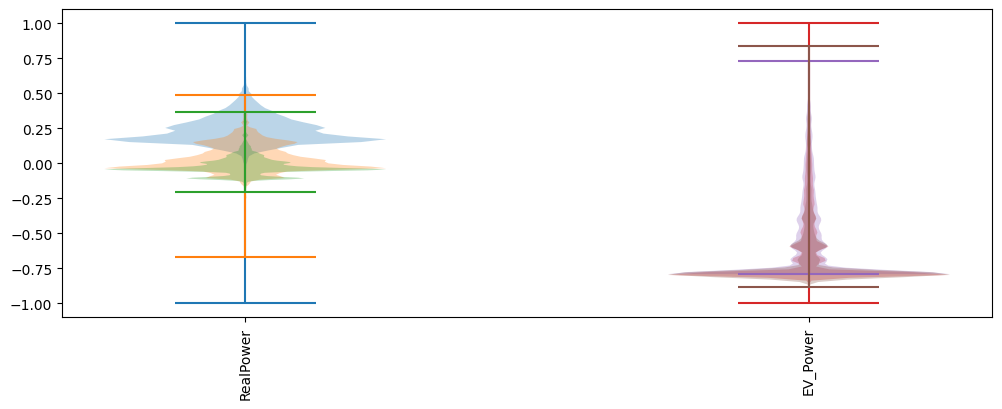

In [18]:
NFEATS = x_tr.shape[2]

fig, ax=plt.subplots(figsize=(12,4))

for i in range (2):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

ax.set_xticks(list(range(NFEATS)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale()


[Text(1, 0, 'RealPower (output)')]

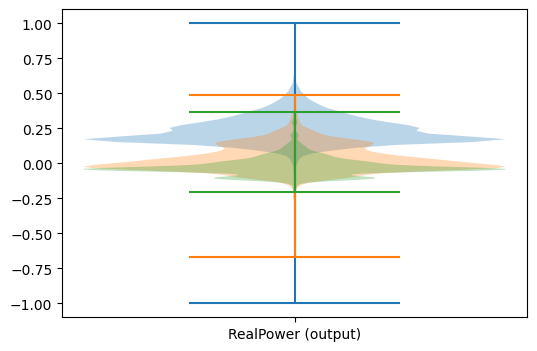

In [19]:
fig, ax=plt.subplots(figsize=(6,4))

ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())

ax.set_xticks([1])
ax.set_xticklabels(["RealPower (output)"])

In [23]:
x_tr_s.shape[1]

96

**Model the LSTM**

In [18]:
# Set parameters for training reproducibility
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

N_UNITS = 150 
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 96 (window) x 2 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' as we want to forecast (regression)

# Loss: the RMSE (root mean squared error) will be used for training.
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compile the model
optimizador = RMSprop(learning_rate=5e-6)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
    metrics=["accuracy"]
)

EPOCHS = 110 
BATCH_SIZE = 256 
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)


Epoch 1/110


82/82 - 19s - loss: 0.3110 - accuracy: 0.0000e+00 - val_loss: 0.0995 - val_accuracy: 0.0000e+00 - 19s/epoch - 232ms/step
Epoch 2/110
82/82 - 16s - loss: 0.2749 - accuracy: 0.0000e+00 - val_loss: 0.0920 - val_accuracy: 0.0000e+00 - 16s/epoch - 199ms/step
Epoch 3/110
82/82 - 18s - loss: 0.2406 - accuracy: 0.0000e+00 - val_loss: 0.0957 - val_accuracy: 0.0000e+00 - 18s/epoch - 223ms/step
Epoch 4/110
82/82 - 17s - loss: 0.2082 - accuracy: 0.0000e+00 - val_loss: 0.1079 - val_accuracy: 0.0000e+00 - 17s/epoch - 211ms/step
Epoch 5/110
82/82 - 17s - loss: 0.1783 - accuracy: 0.0000e+00 - val_loss: 0.1263 - val_accuracy: 0.0000e+00 - 17s/epoch - 204ms/step
Epoch 6/110
82/82 - 16s - loss: 0.1530 - accuracy: 0.0000e+00 - val_loss: 0.1487 - val_accuracy: 0.0000e+00 - 16s/epoch - 191ms/step
Epoch 7/110
82/82 - 17s - loss: 0.1348 - accuracy: 0.0000e+00 - val_loss: 0.1681 - val_accuracy: 0.0000e+00 - 17s/epoch - 207ms/step
Epoch 8/110
82/82 - 14s - loss: 0.1243 - accuracy: 0.0000e+00 - va

*Plot loss: Verify if there's overfitting*

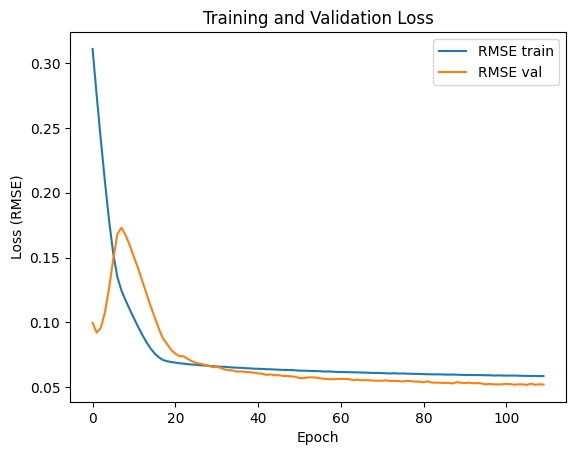

In [19]:
# Graphic training loss and validation loss values
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.title('Training and Validation Loss')

plt.legend()

*Prediction of training values using final model*

In [20]:
y_predict_train= modelo.predict(x_tr_s)

y_predict_train_trans= y_scaler.inverse_transform(y_predict_train)

y_mesuared_train= y_scaler.inverse_transform(y_tr_s[:,:,0])


655/655 [==============================] - 14s 21ms/step


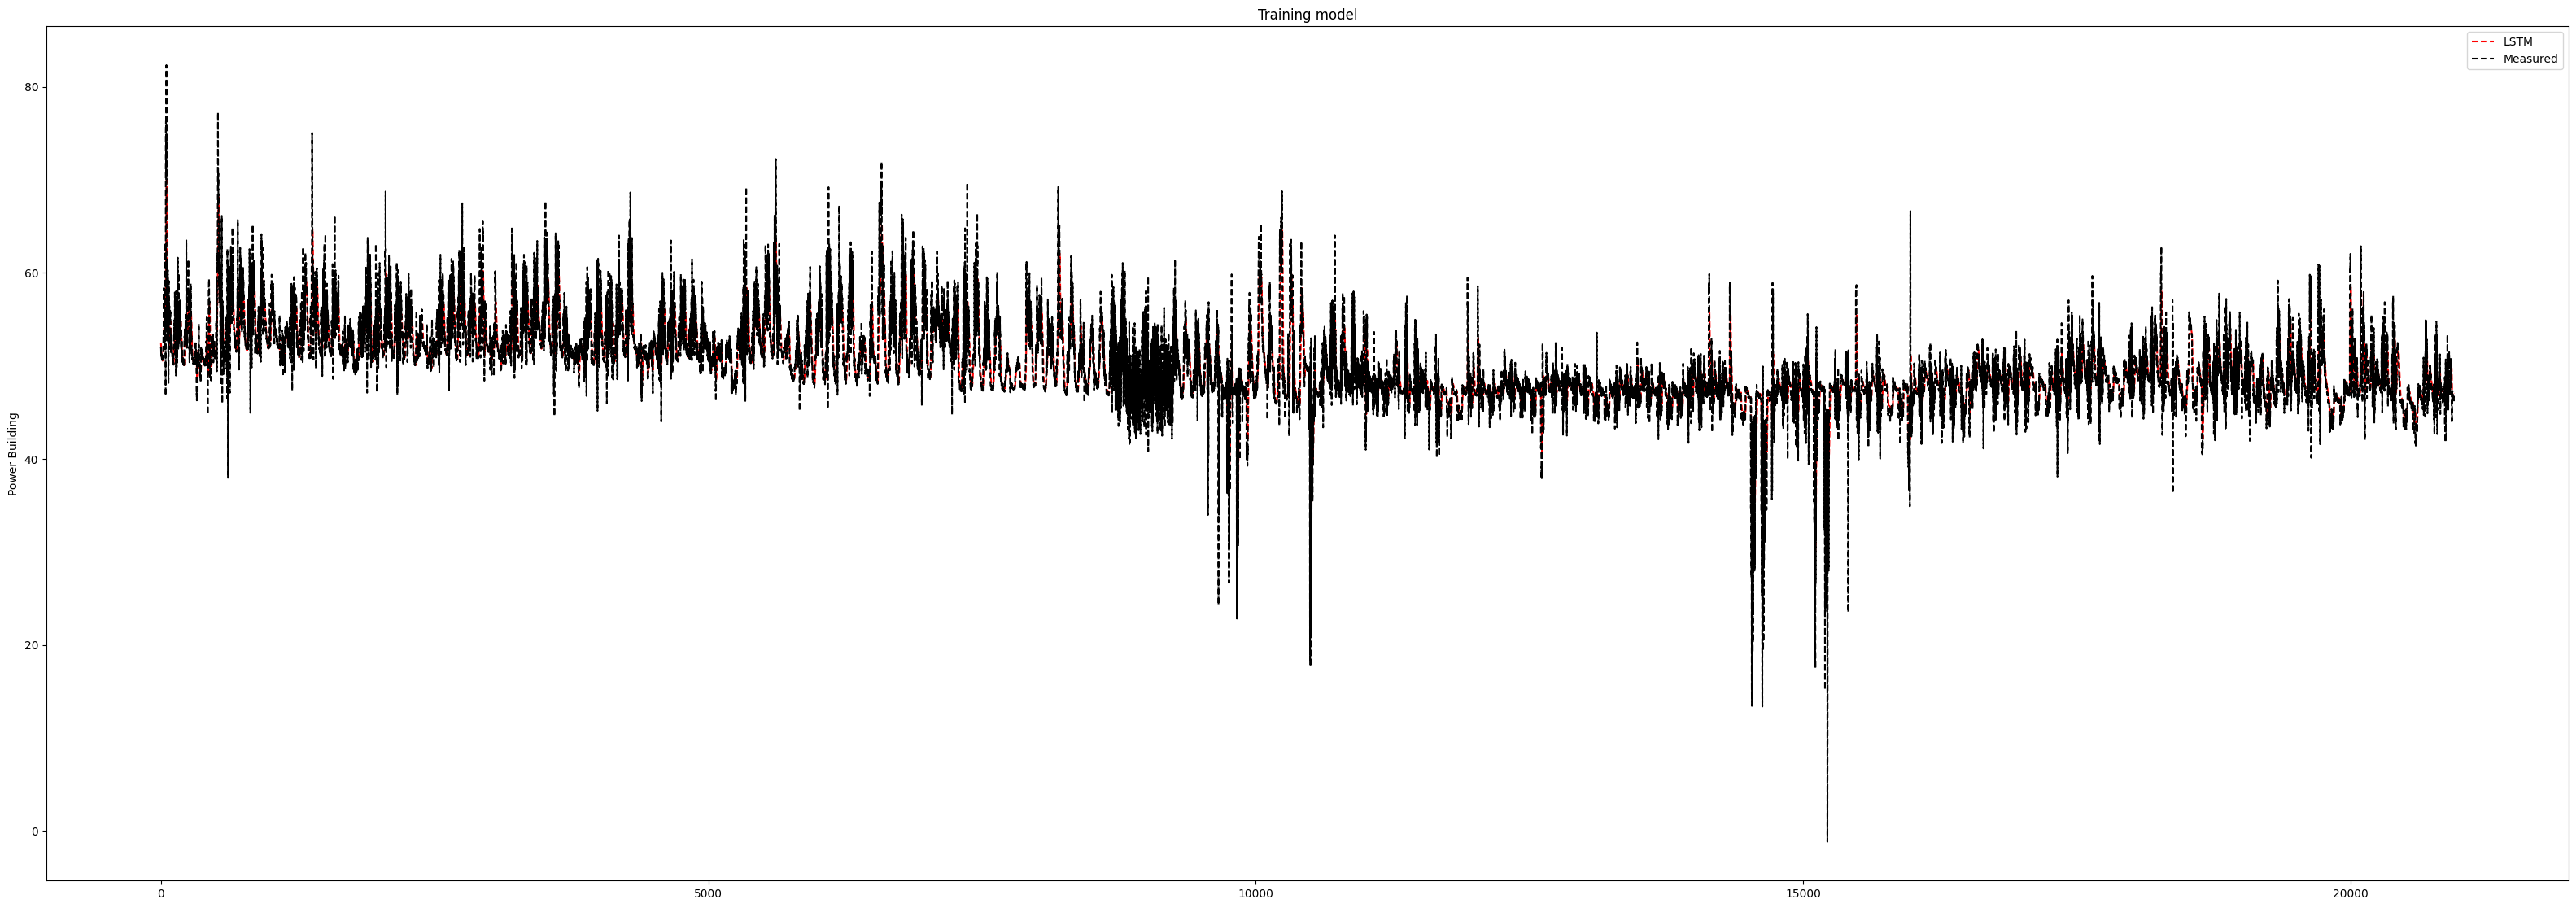

In [21]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot( y_predict_train_trans, "r--", label="LSTM")
plt.plot(y_mesuared_train, "k--", label="Measured")
plt.ylabel("Power Building")
plt.title('Training model')

plt.legend()

**Model performace**

In [22]:
# Find the rmses for training, validation and set test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Print the results
print('Compare performance:')
print(f'  RMSE train:\t {rmse_tr[0]:.3f}')
print(f'  RMSE val:\t {rmse_vl[0]:.3f}')
print(f'  RMSE test:\t {rmse_ts[0]:.3f}')

Comparativo desempeños:
  RMSE train:	 0.048
  RMSE val:	 0.046
  RMSE test:	 0.048


**LSTM: Prediction of testing set using training model**

In [23]:
y_predict= modelo.predict(x_ts_s)

y_predict_trans= y_scaler.inverse_transform(y_predict)

y_mesuared= y_scaler.inverse_transform(y_ts_s[:,:,0])

80/80 [==============================] - 2s 21ms/step


In [24]:
y_mesuared[-10:] #last 10 mesured values

array([[38.424],
       [38.288],
       [38.932],
       [39.218],
       [38.82 ],
       [38.481],
       [38.313],
       [38.493],
       [38.577],
       [38.619]])

In [83]:
y_predict_trans[-10:] #last 10 predicted values

array([[39.743355],
       [39.712887],
       [39.66517 ],
       [39.693176],
       [39.76305 ],
       [39.791893],
       [39.776073],
       [39.732487],
       [39.705074],
       [39.689297]], dtype=float32)

*Plot of mesuared value between lstm model*

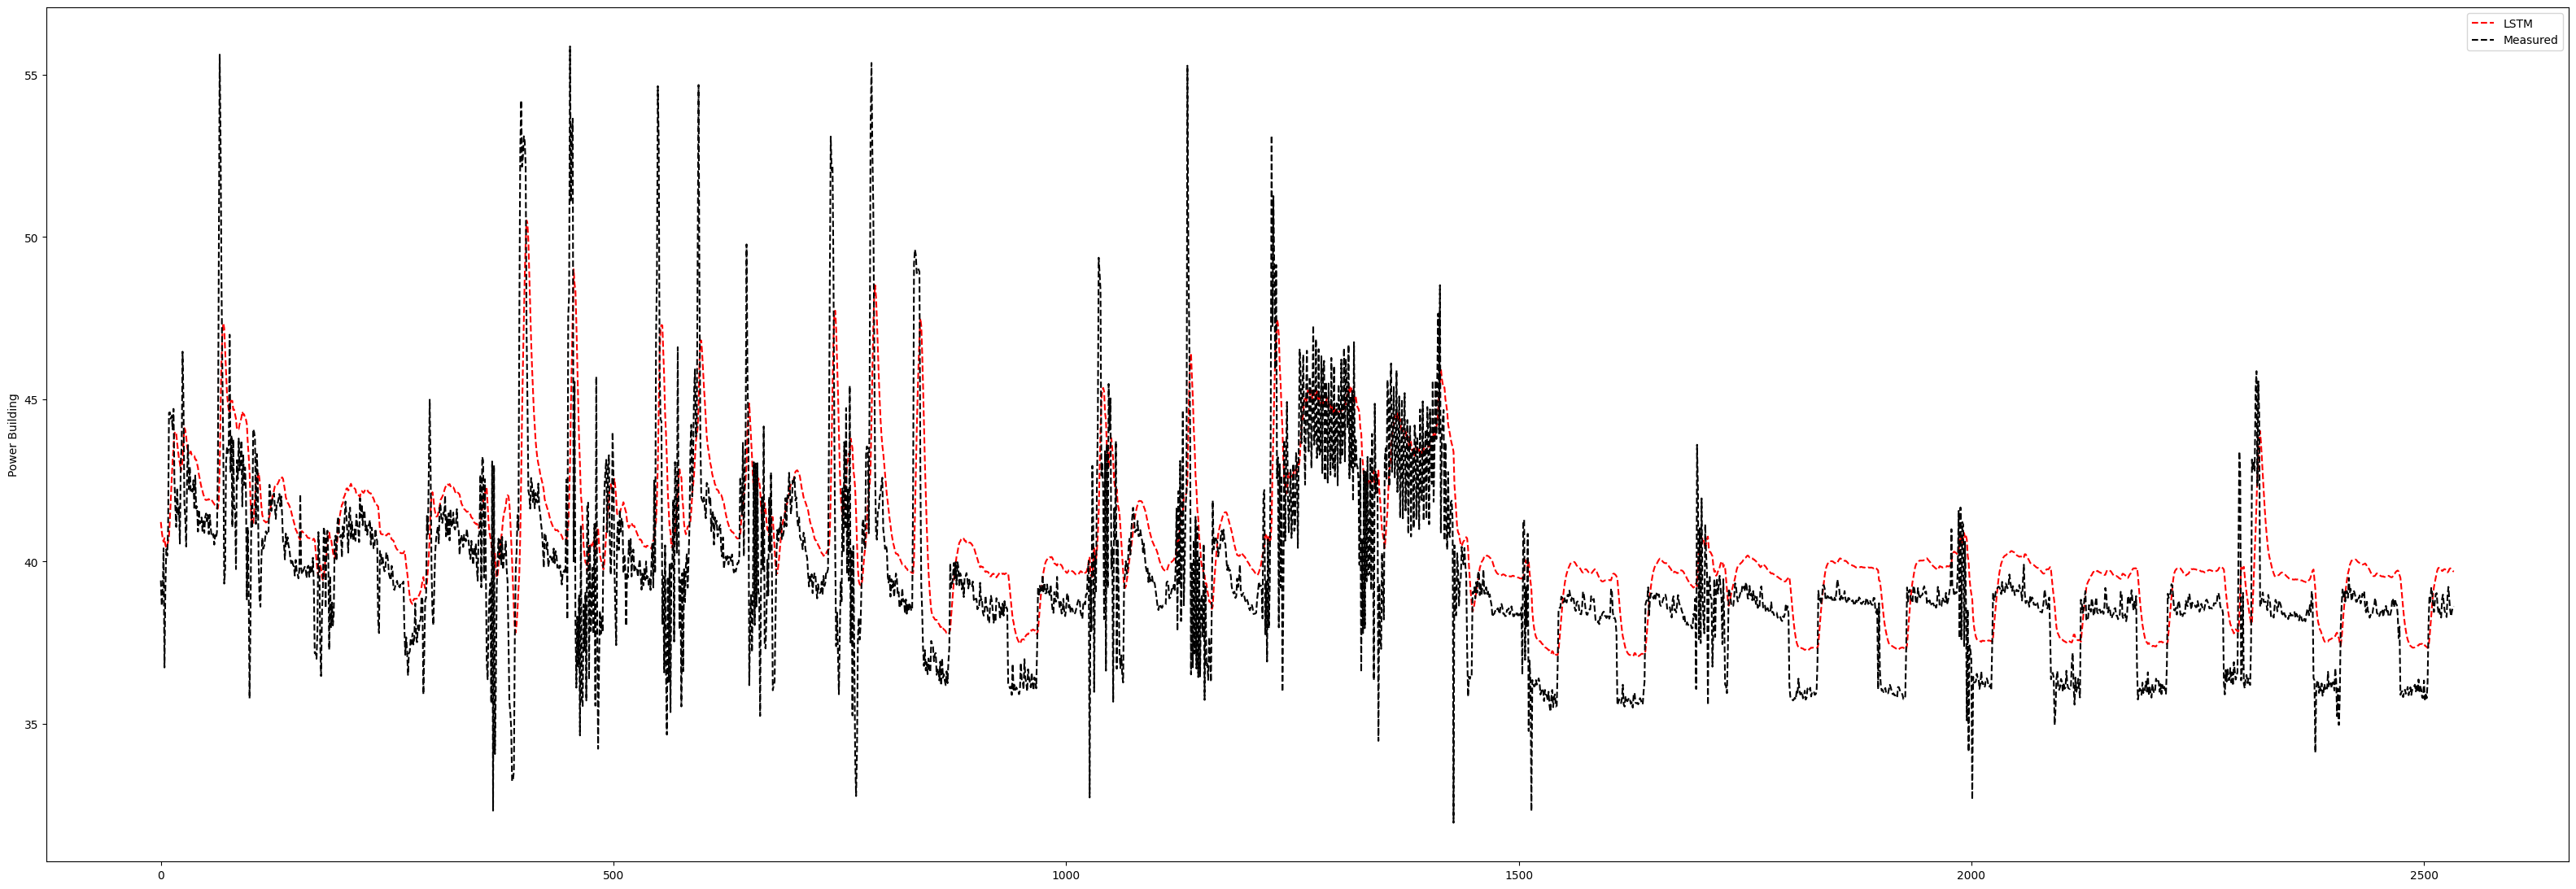

In [25]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot( y_predict_trans, "r--", label="LSTM")
plt.plot(y_mesuared, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()